In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load data
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

# Dataset Information

In [5]:
# Preview of data
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
# Number of columns and samples
columns = len(df.columns)
samples = len(df)
print(f"No. of Columns: {columns}")
print(f"No. of Samples: {samples}")

No. of Columns: 22
No. of Samples: 253680


In [7]:
# Basic statistics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
# Drop columns which are not related to the health indicators
df.drop(columns=["Education", "Income"], inplace=True)

# Dataset Visualisation

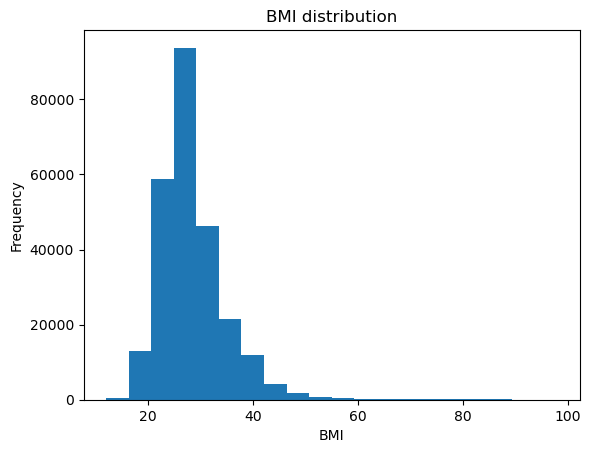

In [9]:
# BMI Distribution
plot = df["BMI"].hist(bins=20)
plot.set_title('BMI distribution')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig("../visualisations/bmi_distribution.png")
plt.show()

In [10]:
# Find Null Values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

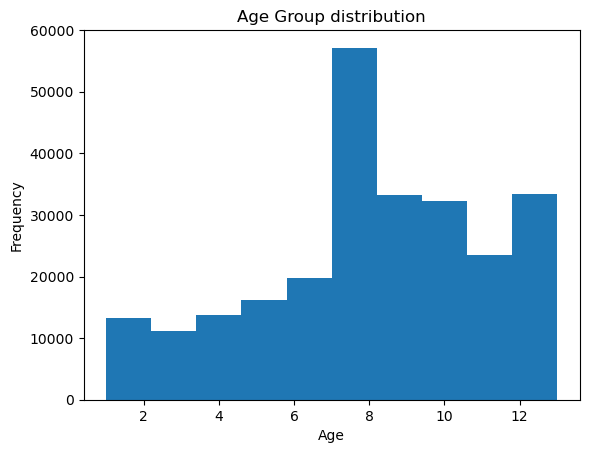

In [11]:
# Age Group Distribution
plot = df["Age"].hist()
plot.set_title('Age Group distribution')
plot.set_xlabel('Age')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig('../visualisations/age_group_distribution.png')
plt.show()

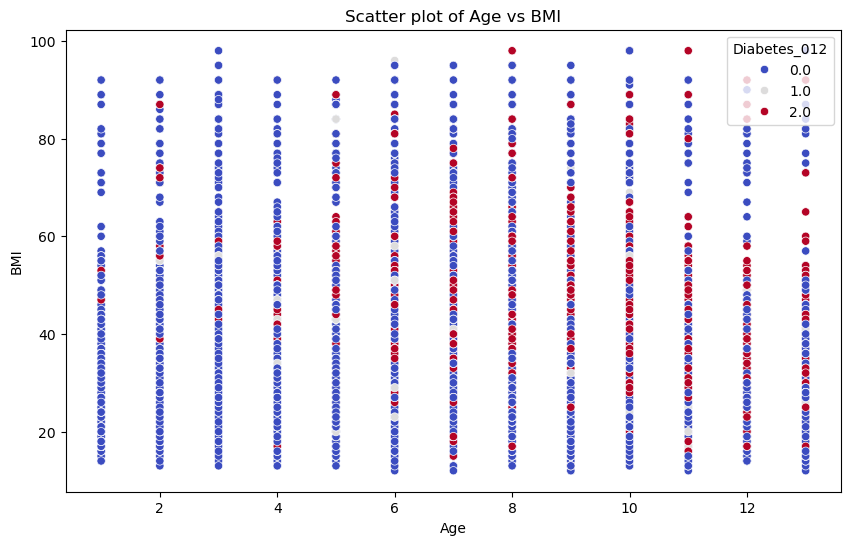

In [12]:
# Scatter plot for Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Diabetes_012', palette='coolwarm')
plt.title('Scatter plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.savefig('../visualisations/age_bmi_scatterplot.png')
plt.show()

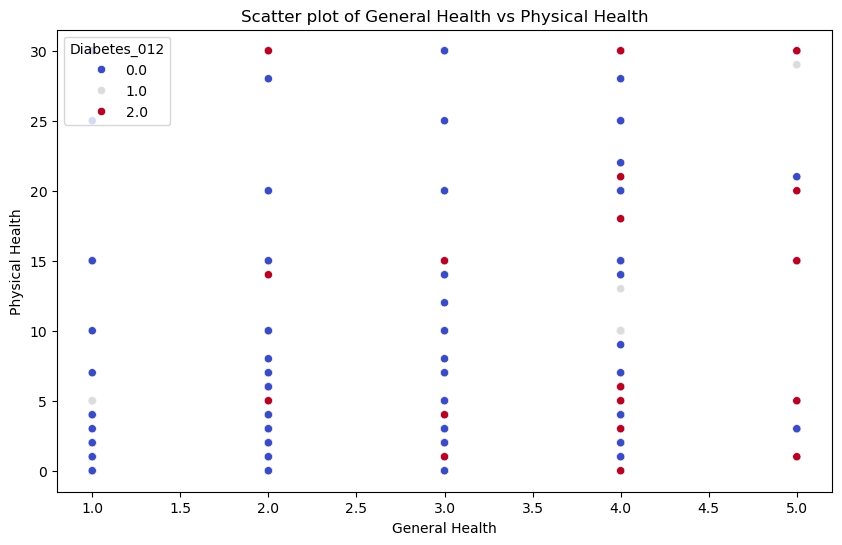

In [13]:
# Scatter plot for General Health vs Physical Health
plt.figure(figsize=(10, 6))

# Get top 1000 samples to avoid overplotting
sns.scatterplot(data=df.sample(1000), x='GenHlth', y='PhysHlth', hue='Diabetes_012', palette='coolwarm')

plt.title('Scatter plot of General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health')
plt.savefig('../visualisations/genhealth_phyhealth_scatterplot.png')
plt.show()

In [14]:
# Find correlation data
corr = df.corr() 
corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547


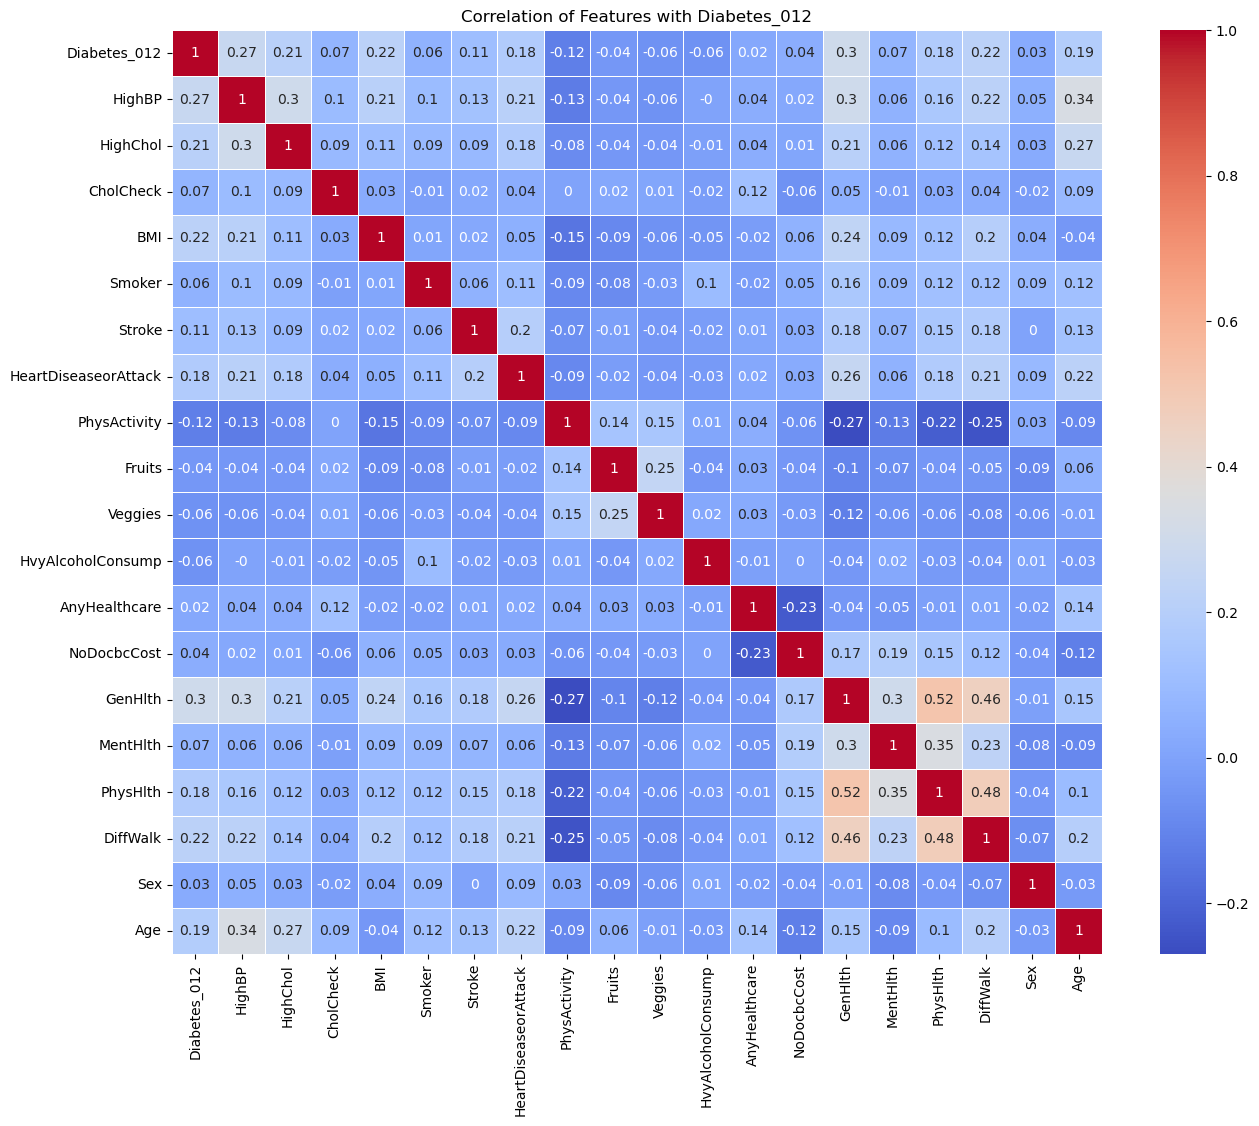

In [15]:
# Correlation Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr.map(lambda x: round(x, 2)), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.savefig('../visualisations/correlation_heatmap.png')
plt.show()

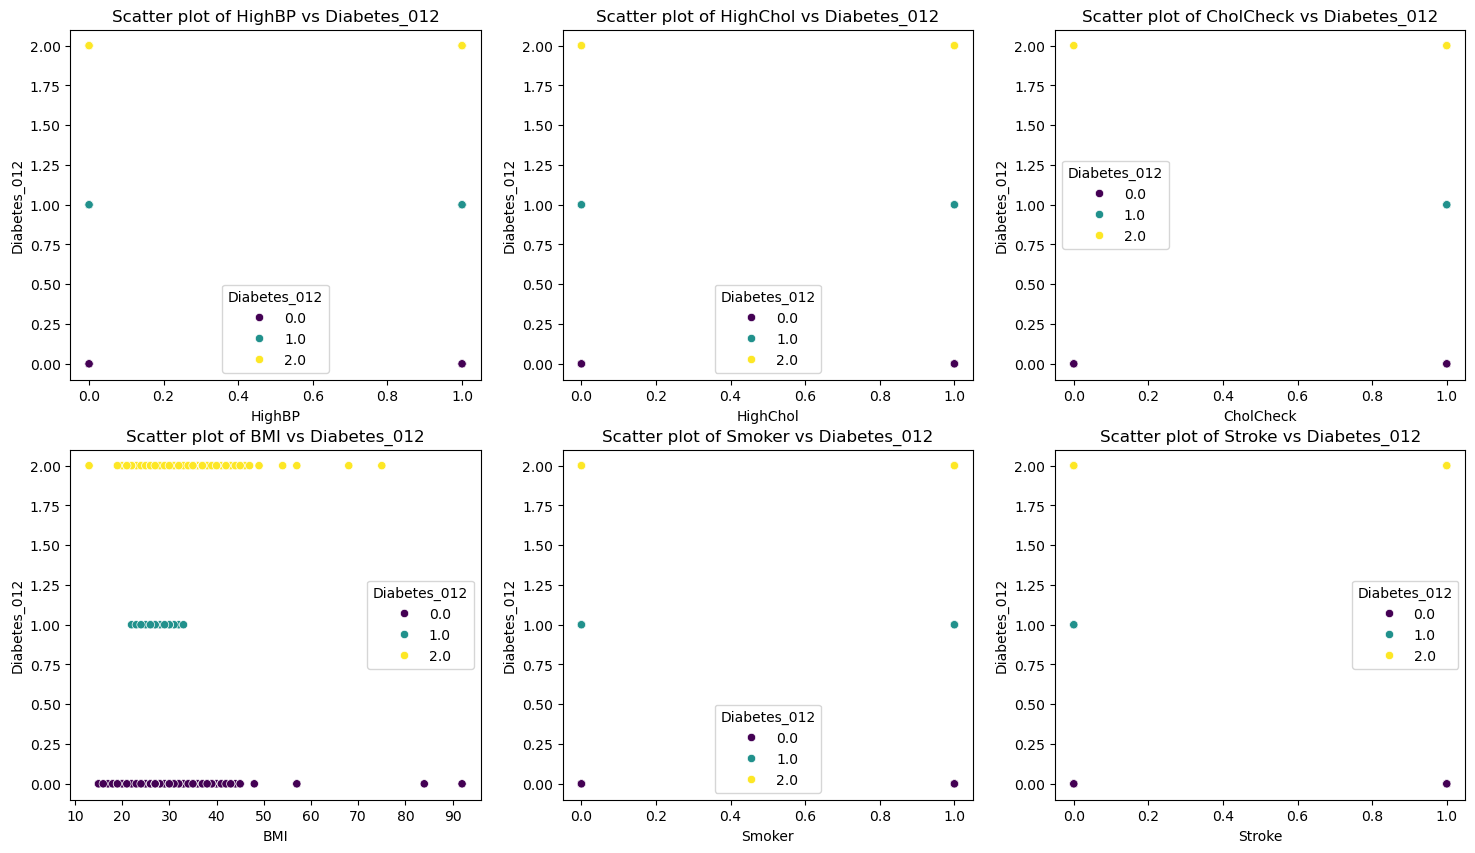

In [16]:
# Get the top 3 most correlated features with Diabetes_012
top_features = corr.drop(labels=["Diabetes_012"], axis=0).head(6).index

# Plot scatterplots for the top 6 features
plt.figure(figsize=(18, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    
    # Get top 1000 samples to avoid overplotting
    sns.scatterplot(data=df.sample(1000), x=feature, y='Diabetes_012', hue='Diabetes_012', palette='viridis')
    plt.title(f'Scatter plot of {feature} vs Diabetes_012')
    plt.xlabel(feature)
    plt.ylabel('Diabetes_012')

plt.savefig('../visualisations/top_features_scatterplots.png')
plt.show()

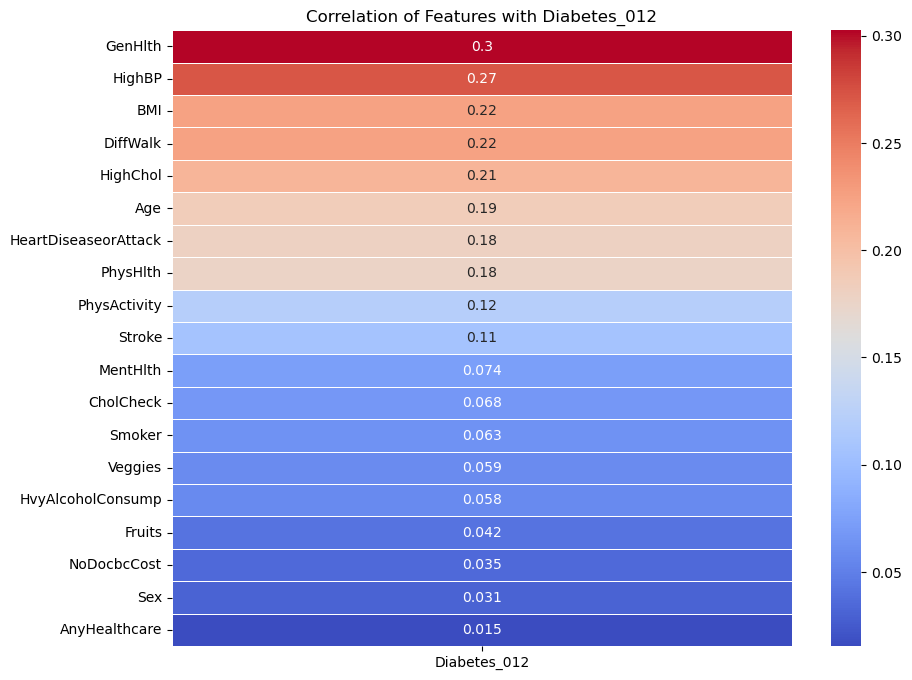

In [17]:
# Correlation of Features with Diabetes_012
clean_corr = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0).map(lambda x: abs(x)).sort_values(by='Diabetes_012', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(clean_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.savefig('../visualisations/correlation_with_diabetes.png')
plt.show()

In [18]:
# Get most related columns
clean_df = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0)
clean_df = clean_df[abs(clean_df["Diabetes_012"]) > 0.1]
related_columns = [*clean_df.index]
related_columns

['HighBP',
 'HighChol',
 'BMI',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age']

# Preprocessing

In [19]:
from sklearn.model_selection import train_test_split

# Load data
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# Load data from the most related columns
X_spec = df.drop(columns=["Diabetes_012", *[c for c in df.columns if c not in related_columns]])
y_spec = df["Diabetes_012"]

# Split data into training and testing sets
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X, y, test_size=0.3)

# Model Training

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # get precision
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # get recall
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # get f1 score
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=np.nan)
    
    # get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }
    
    return metrics

In [22]:
# format metrics output as string
def format_metrics(metrics):
    result = ""

    for metric, value in metrics.items():
        result += f"{metric}: {'\n' if metric == 'Confusion Matrix' or metric == 'Classification Report' else ''} {value}"
        result += "\n"
        
    return result

In [23]:
from sklearn.utils.validation import check_is_fitted

# check if model has been fitted
def is_model_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except:
        return False

In [24]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    if not is_model_fitted(model):
        model.fit(X_train, y_train)
    
    metrics = evaluate_model(model, X_test, y_test)
    result = format_metrics(metrics)
        
    return metrics, result

In [25]:
# plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [26]:
import joblib

# save full model weights to disk
def save_model(model, filename=None):
    joblib.dump(model, filename)

## Logistic Regression

### Testing across all features

In [27]:
from sklearn.linear_model import LogisticRegression

# Load Logistic Regression model
if not 'lr_model' in locals():
    lr_model = LogisticRegression(max_iter=1000)
    
metrics, results = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.8447913381688216
Precision:  0.7958172521493401
Recall:  0.8447913381688216
F1 Score:  0.8049781301500801
Confusion Matrix: 
 [[62541     0  1548]
 [ 1275     0   134]
 [ 8855     0  1751]]
Classification Report: 
 {'0.0': {'precision': 0.8606046428423993, 'recall': 0.9758460890324393, 'f1-score': 0.9146095349517402, 'support': 64089.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1409.0}, '2.0': {'precision': 0.5100495193708127, 'recall': 0.16509522911559493, 'f1-score': 0.24944796637937175, 'support': 10606.0}, 'accuracy': 0.8447913381688216, 'macro avg': {'precision': 0.45688472073773734, 'recall': 0.38031377271601147, 'f1-score': 0.3880191671103707, 'support': 76104.0}, 'weighted avg': {'precision': 0.7958172521493401, 'recall': 0.8447913381688216, 'f1-score': 0.8049781301500801, 'support': 76104.0}}



In [28]:
save_model(lr_model, '../models/lr_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [29]:
# Load Logistic Regression model
if not 'lr_spec_model' in locals():
    lr_spec_model = LogisticRegression(max_iter=1000)

metrics, results = train_and_evaluate_model(lr_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.8458162514453905
Precision:  0.7988679829590515
Recall:  0.8458162514453905
F1 Score:  0.8069653596437104
Confusion Matrix: 
 [[62518     0  1560]
 [ 1246     0   115]
 [ 8813     0  1852]]
Classification Report: 
 {'0.0': {'precision': 0.8614023726524932, 'recall': 0.9756546708698773, 'f1-score': 0.9149756686546413, 'support': 64078.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1361.0}, '2.0': {'precision': 0.5250921462999717, 'recall': 0.17365213314580402, 'f1-score': 0.26099210822998875, 'support': 10665.0}, 'accuracy': 0.8458162514453905, 'macro avg': {'precision': 0.4621648396508216, 'recall': 0.3831022680052271, 'f1-score': 0.3919892589615433, 'support': 76104.0}, 'weighted avg': {'precision': 0.7988679829590515, 'recall': 0.8458162514453905, 'f1-score': 0.8069653596437104, 'support': 76104.0}}



In [30]:
save_model(lr_spec_model, '../models/lr_spec.joblib')

## K-Nearest Neighbours

### Testing across all features

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Load K-Nearest Neighbors model
if not 'kn_model' in locals():
    kn_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.8305082518658677
Precision:  0.7836644185124926
Recall:  0.8305082518658677
F1 Score:  0.7998559647217196
Confusion Matrix: 
 [[61106    43  2940]
 [ 1236     4   169]
 [ 8486    25  2095]]
Classification Report: 
 {'0.0': {'precision': 0.8627379002654317, 'recall': 0.9534553511523038, 'f1-score': 0.9058309923879125, 'support': 64089.0}, '1.0': {'precision': 0.05555555555555555, 'recall': 0.0028388928317956, 'f1-score': 0.0054017555705604325, 'support': 1409.0}, '2.0': {'precision': 0.4025749423520369, 'recall': 0.19752970016971524, 'f1-score': 0.265022137887413, 'support': 10606.0}, 'accuracy': 0.8305082518658677, 'macro avg': {'precision': 0.44028946605767477, 'recall': 0.3846079813846049, 'f1-score': 0.3920849619486287, 'support': 76104.0}, 'weighted avg': {'precision': 0.7836644185124926, 'recall': 0.8305082518658677, 'f1-score': 0.7998559647217196, 'support': 76104.0}}



In [32]:
save_model(kn_model, '../models/kn_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [33]:
# Load K-Nearest Neighbors model
if not 'kn_spec_model' in locals():
    kn_spec_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.8300746347103963
Precision:  0.7836640765079431
Recall:  0.8300746347103963
F1 Score:  0.7996860365614599
Confusion Matrix: 
 [[61067    47  2964]
 [ 1171     5   185]
 [ 8535    30  2100]]
Classification Report: 
 {'0.0': {'precision': 0.8628573043392254, 'recall': 0.9530103935828209, 'f1-score': 0.9056959162334725, 'support': 64078.0}, '1.0': {'precision': 0.06097560975609756, 'recall': 0.0036737692872887582, 'f1-score': 0.00693000693000693, 'support': 1361.0}, '2.0': {'precision': 0.40007620499142693, 'recall': 0.19690576652601968, 'f1-score': 0.26391856227221316, 'support': 10665.0}, 'accuracy': 0.8300746347103963, 'macro avg': {'precision': 0.44130303969558327, 'recall': 0.38452997646537646, 'f1-score': 0.3921814951452309, 'support': 76104.0}, 'weighted avg': {'precision': 0.7836640765079431, 'recall': 0.8300746347103963, 'f1-score': 0.7996860365614599, 'support': 76104.0}}



In [34]:
save_model(kn_spec_model, '../models/kn_spec.joblib')

## Decision Tree Classifier

### Testing across all features

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Load Decision Tree model
if not 'dt_model' in locals():
    dt_model = DecisionTreeClassifier()

metrics, results = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.7791049090717965
Precision:  0.7785150664275517
Recall:  0.7791049090717965
F1 Score:  0.7787962623788339
Confusion Matrix: 
 [[56118  1146  6825]
 [ 1052    43   314]
 [ 7082   392  3132]]
Classification Report: 
 {'0.0': {'precision': 0.8734047189192554, 'recall': 0.8756260824790526, 'f1-score': 0.8745139900733203, 'support': 64089.0}, '1.0': {'precision': 0.02719797596457938, 'recall': 0.030518097941802696, 'f1-score': 0.028762541806020066, 'support': 1409.0}, '2.0': {'precision': 0.30493622821536365, 'recall': 0.2953045445973977, 'f1-score': 0.30004310964218994, 'support': 10606.0}, 'accuracy': 0.7791049090717965, 'macro avg': {'precision': 0.4018463076997328, 'recall': 0.4004829083394177, 'f1-score': 0.4011065471738435, 'support': 76104.0}, 'weighted avg': {'precision': 0.7785150664275517, 'recall': 0.7791049090717965, 'f1-score': 0.7787962623788339, 'support': 76104.0}}



In [36]:
save_model(dt_model, '../models/dt_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [37]:
# Load Decision Tree model
if not 'dt_spec_model' in locals():
    dt_spec_model = DecisionTreeClassifier()
    
metrics, results = train_and_evaluate_model(dt_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.7823767476085357
Precision:  0.7813030208879619
Recall:  0.7823767476085357
F1 Score:  0.7818085563506775
Confusion Matrix: 
 [[56273  1184  6621]
 [ 1009    39   313]
 [ 7065   370  3230]]
Classification Report: 
 {'0.0': {'precision': 0.8745240648359675, 'recall': 0.8781953244483286, 'f1-score': 0.8763558497177341, 'support': 64078.0}, '1.0': {'precision': 0.02448210922787194, 'recall': 0.028655400440852314, 'f1-score': 0.026404874746106973, 'support': 1361.0}, '2.0': {'precision': 0.31778827233372686, 'recall': 0.30285982184716365, 'f1-score': 0.31014451005809207, 'support': 10665.0}, 'accuracy': 0.7823767476085357, 'macro avg': {'precision': 0.4055981487991887, 'recall': 0.4032368489121148, 'f1-score': 0.40430174484064435, 'support': 76104.0}, 'weighted avg': {'precision': 0.7813030208879619, 'recall': 0.7823767476085357, 'f1-score': 0.7818085563506775, 'support': 76104.0}}



In [38]:
save_model(dt_spec_model, '../models/dt_spec.joblib')

## Random Forest Classifier

### Testing across all features

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Load Random Forest model
if not 'rf_model' in locals():
    rf_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.834423946178913
Precision:  0.791529413706198
Recall:  0.834423946178913
F1 Score:  0.8059020431389174
Confusion Matrix: 
 [[61148   114  2827]
 [ 1222     8   179]
 [ 8215    44  2347]]
Classification Report: 
 {'0.0': {'precision': 0.8663030388892824, 'recall': 0.9541106898219663, 'f1-score': 0.9080891634613957, 'support': 64089.0}, '1.0': {'precision': 0.04819277108433735, 'recall': 0.0056777856635912, 'f1-score': 0.010158730158730159, 'support': 1409.0}, '2.0': {'precision': 0.4384457313655894, 'recall': 0.22128983594191967, 'f1-score': 0.29412870480606557, 'support': 10606.0}, 'accuracy': 0.834423946178913, 'macro avg': {'precision': 0.4509805137797364, 'recall': 0.39369277047582574, 'f1-score': 0.4041255328087305, 'support': 76104.0}, 'weighted avg': {'precision': 0.791529413706198, 'recall': 0.834423946178913, 'f1-score': 0.8059020431389174, 'support': 76104.0}}



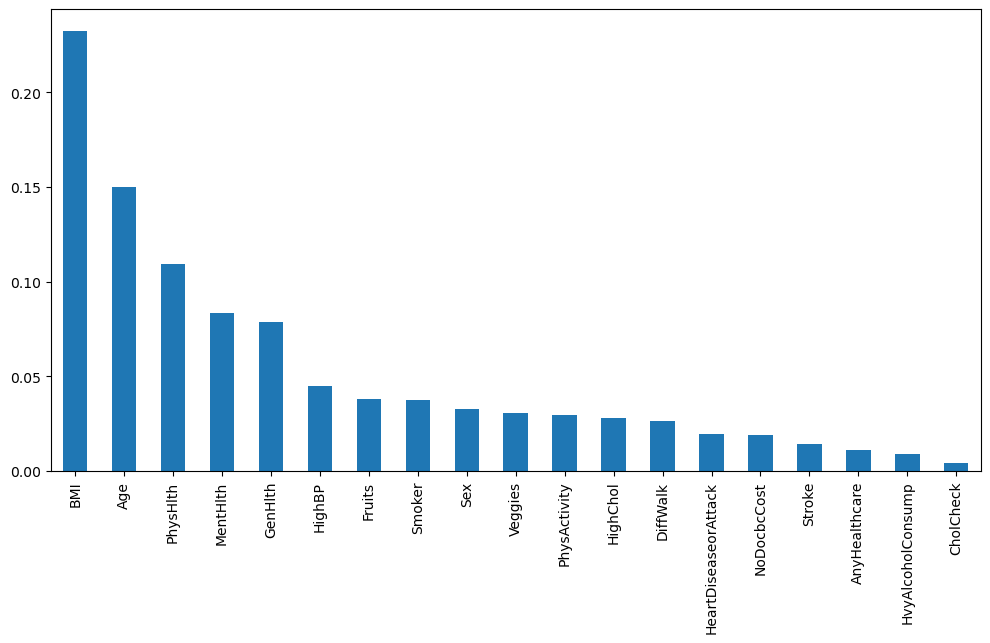

In [40]:
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=["Diabetes_012"]).columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.show()

### Testing across features with correlation scores of >|0.1|

In [41]:
# Load Decision Tree model
if not 'rf_spec_model' in locals():
    rf_spec_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.8340166088510459
Precision:  0.7910268652914264
Recall:  0.8340166088510459
F1 Score:  0.8058316274120062
Confusion Matrix: 
 [[61088   126  2864]
 [ 1174     1   186]
 [ 8250    32  2383]]
Classification Report: 
 {'0.0': {'precision': 0.8663489902427955, 'recall': 0.9533381191672649, 'f1-score': 0.9077643212720113, 'support': 64078.0}, '1.0': {'precision': 0.006289308176100629, 'recall': 0.0007347538574577516, 'f1-score': 0.0013157894736842105, 'support': 1361.0}, '2.0': {'precision': 0.43861586600404934, 'recall': 0.223441162681669, 'f1-score': 0.2960616225618089, 'support': 10665.0}, 'accuracy': 0.8340166088510459, 'macro avg': {'precision': 0.43708472147431515, 'recall': 0.39250467856879717, 'f1-score': 0.40171391110250143, 'support': 76104.0}, 'weighted avg': {'precision': 0.7910268652914264, 'recall': 0.8340166088510459, 'f1-score': 0.8058316274120062, 'support': 76104.0}}



In [42]:
import csv
import os

def save_metrics(metrics, directory_name):
    # Create directory if it doesn't exist
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    
    # Save general metrics to CSV
    general_metrics_file = os.path.join(directory_name, 'general_metrics.csv')
    with open(general_metrics_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Metric", "Value"])
        for metric, value in metrics.items():
            if metric not in ["Confusion Matrix", "Classification Report"]:
                writer.writerow([metric, value])
    
    # Save confusion matrix to CSV
    confusion_matrix_file = os.path.join(directory_name, 'confusion_matrix.csv')
    with open(confusion_matrix_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([""] + ["Predicted 0", "Predicted 1", "Predicted 2"])
        for i, row in enumerate(metrics["Confusion Matrix"]):
            writer.writerow([f"Actual {i}"] + list(row))
    
    # Save classification report to CSV
    classification_report_file = os.path.join(directory_name, 'classification_report.csv')
    with open(classification_report_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Class", "Precision", "Recall", "F1-Score", "Support"])
        for label, c_metrics in metrics["Classification Report"].items():
            if isinstance(c_metrics, dict):
                writer.writerow([label, c_metrics["precision"], c_metrics["recall"], c_metrics["f1-score"], c_metrics["support"]])

In [43]:
# Define a list of models to compare
models = [
    ("lr", lr_model, X_test, y_test, lr_spec_model, X_spec_test, y_spec_test),
    ("kn", kn_model, X_test, y_test, kn_spec_model, X_spec_test, y_spec_test),
    ("dt", dt_model, X_test, y_test, dt_spec_model, X_spec_test, y_spec_test),
    ("rf", rf_model, X_test, y_test, rf_spec_model, X_spec_test, y_spec_test)
]

# Compare the models
comparison_results = {}
for name, model, X_test, y_test, spec_model, X_spec_test, y_spec_test in models:
    metrics = evaluate_model(model, X_test, y_test)
    result = format_metrics(metrics)
    spec_metrics = evaluate_model(spec_model, X_spec_test, y_spec_test)
    spec_result = format_metrics(spec_metrics)
    
    comparison_results[name] = {
        "General Model": metrics,
        "Specific Model": spec_metrics
    }
    
    print(f"Results for {name} (General Model):\n{result}\n")
    print(f"Results for {name} (Specific Model):\n{spec_result}\n")

Results for lr (General Model):
Accuracy:  0.8447913381688216
Precision:  0.7958172521493401
Recall:  0.8447913381688216
F1 Score:  0.8049781301500801
Confusion Matrix: 
 [[62541     0  1548]
 [ 1275     0   134]
 [ 8855     0  1751]]
Classification Report: 
 {'0.0': {'precision': 0.8606046428423993, 'recall': 0.9758460890324393, 'f1-score': 0.9146095349517402, 'support': 64089.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1409.0}, '2.0': {'precision': 0.5100495193708127, 'recall': 0.16509522911559493, 'f1-score': 0.24944796637937175, 'support': 10606.0}, 'accuracy': 0.8447913381688216, 'macro avg': {'precision': 0.45688472073773734, 'recall': 0.38031377271601147, 'f1-score': 0.3880191671103707, 'support': 76104.0}, 'weighted avg': {'precision': 0.7958172521493401, 'recall': 0.8447913381688216, 'f1-score': 0.8049781301500801, 'support': 76104.0}}


Results for lr (Specific Model):
Accuracy:  0.8458162514453905
Precision:  0.7988679829590515
Recall:  0.8458162

In [44]:
from tqdm import tqdm

# Save all metrics to CSV files
for name, model, X_test, y_test, spec_model, X_spec_test, y_spec_test in tqdm(models):
    # General model metrics
    metrics = evaluate_model(model, X_test, y_test)
    save_metrics(metrics, f'../results/{name.lower().replace(" ", "_")}_full')
    
    # Specific model metrics
    spec_metrics = evaluate_model(spec_model, X_spec_test, y_spec_test)
    save_metrics(spec_metrics, f'../results/{name.lower().replace(" ", "_")}_spec')

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [01:29<00:00, 22.46s/it]
